In [290]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/airlines-flights-data


In [291]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [292]:
os.listdir(path)

['airlines_flights_data.csv']

In [293]:
full_path = os.path.join(path,os.listdir(path)[0])

In [294]:
df = pd.read_csv(full_path)

In [295]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [297]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [298]:
df.isnull().sum()

,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [299]:
df.duplicated().sum()

np.int64(0)

In [300]:
df=df.drop(columns="index")

In [301]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


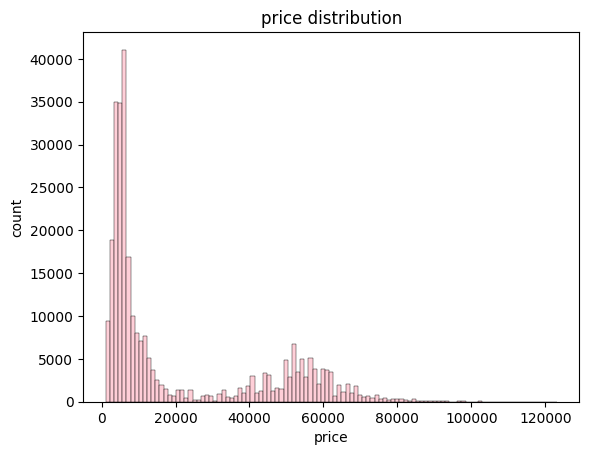

In [302]:
sns.histplot(df["price"],color="pink")
plt.title("price distribution")
plt.xlabel("price")
plt.ylabel("count")
plt.show()

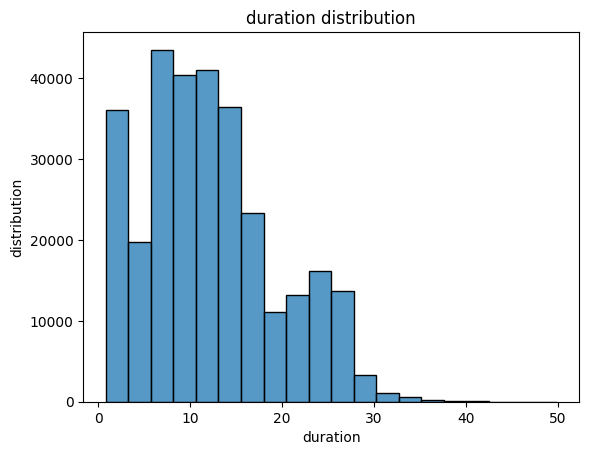

In [303]:
sns.histplot(df["duration"],bins=20)
plt.title("duration distribution")
plt.xlabel("duration")
plt.ylabel("distribution")
plt.show()

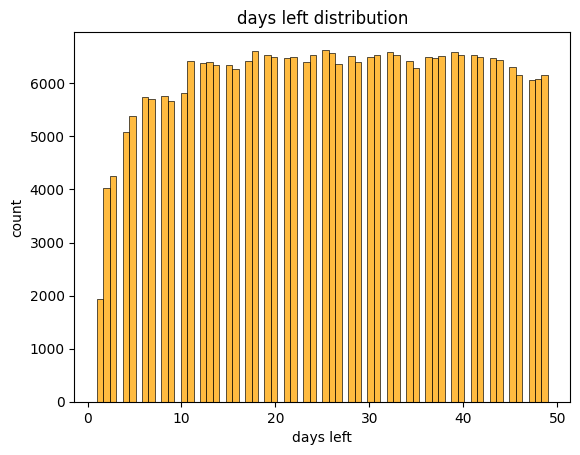

In [304]:
sns.histplot(df["days_left"],color="orange")
plt.title("days left distribution")
plt.xlabel("days left")
plt.ylabel("count")
plt.show()

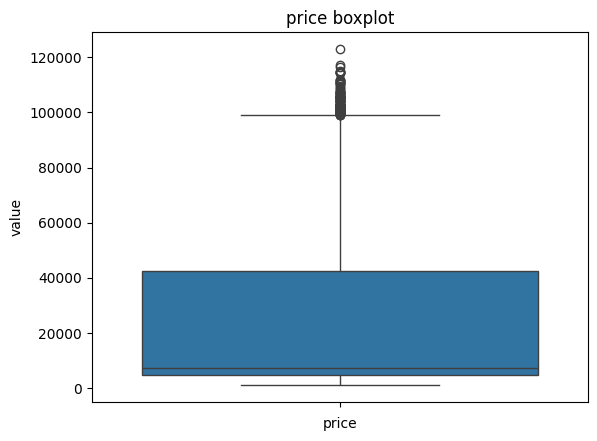

In [305]:
sns.boxplot(df["price"])
plt.title("price boxplot")
plt.xlabel("price")
plt.ylabel("value")
plt.show()

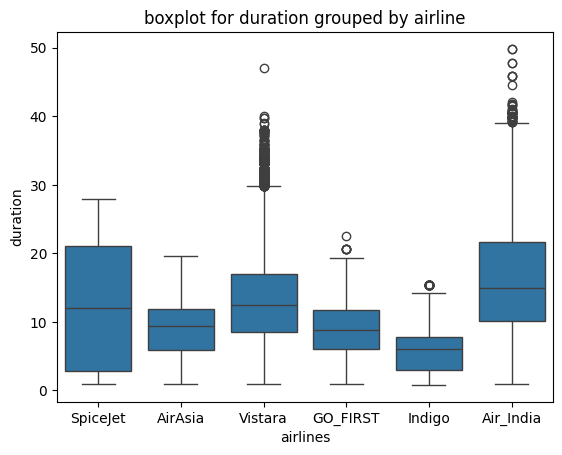

In [306]:
sns.boxplot(x="airline",y="duration",data=df)
plt.title("boxplot for duration grouped by airline")
plt.xlabel("airlines")
plt.ylabel("duration")
plt.show()

air india has the highst duration and has more outliers

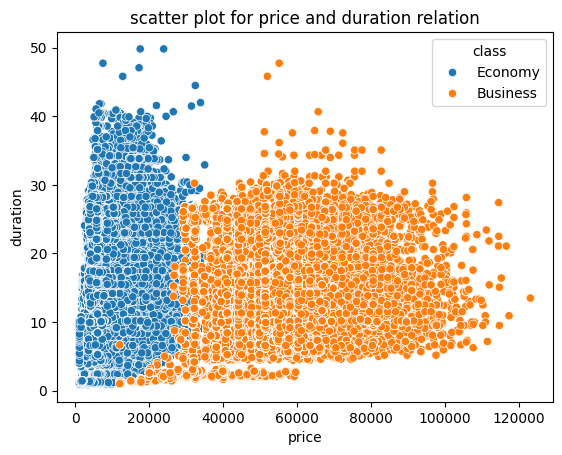

In [307]:
sns.scatterplot(x="price",y="duration",data=df,hue="class")
plt.title("scatter plot for price and duration relation")
plt.xlabel("price")
plt.ylabel("duration")
plt.show()

business class paid more money and spent less duration

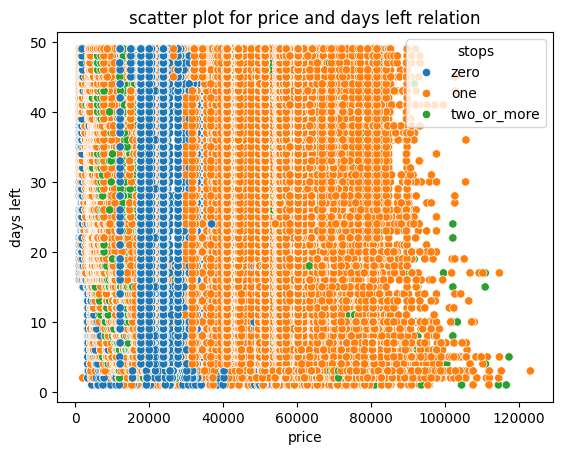

In [308]:
sns.scatterplot(x="price",y="days_left",data=df,hue="stops")
plt.title("scatter plot for price and days left relation")
plt.xlabel("price")
plt.ylabel("days left")
plt.show()

people who had 1 stop paid more than who had zero or two and more

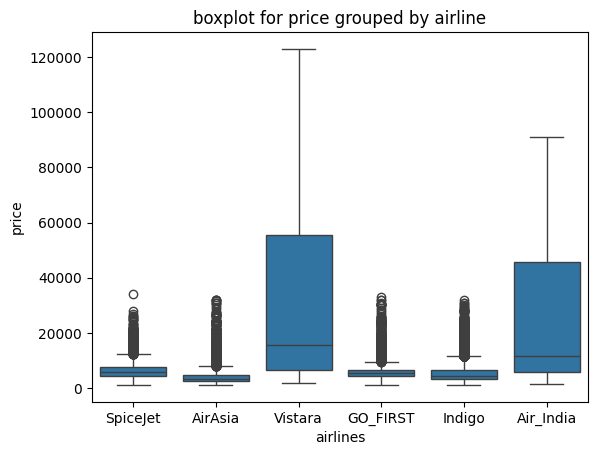

In [309]:
sns.boxplot(x="airline",y="price",data=df)
plt.title("boxplot for price grouped by airline")
plt.xlabel("airlines")
plt.ylabel("price")
plt.show()

average fares are low except for air india and vistara

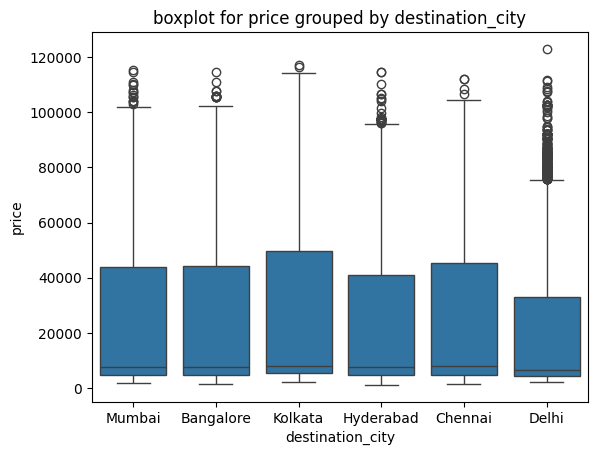

In [310]:
sns.boxplot(x="destination_city",y="price",data=df)
plt.title("boxplot for price grouped by destination_city")
plt.xlabel("destination_city")
plt.ylabel("price")
plt.show()

delhi destination has the highst price outliers

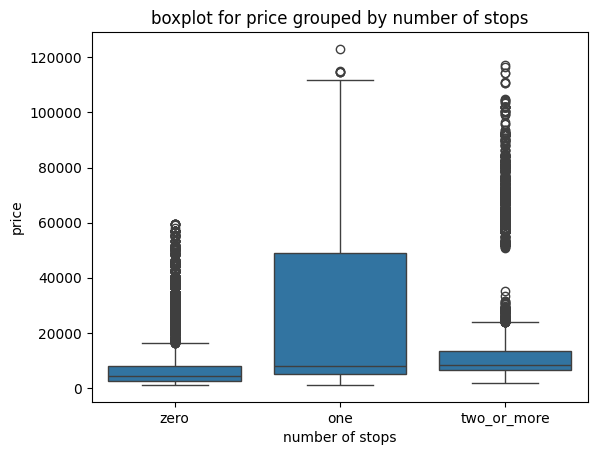

In [311]:
sns.boxplot(x="stops",y="price",data=df)
plt.title("boxplot for price grouped by number of stops")
plt.xlabel("number of stops")
plt.ylabel("price")
plt.show()

one stop has the widest and highst price range , and the two or more stops has a lot of outliers

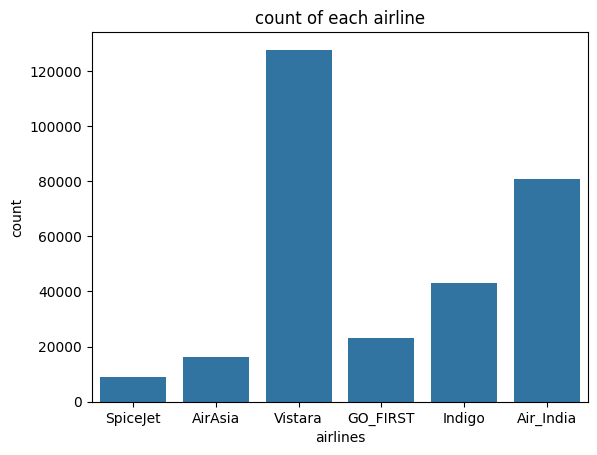

In [312]:
sns.countplot(x="airline",data=df)
plt.title("count of each airline")
plt.xlabel("airlines")
plt.ylabel("count")
plt.show()

the highst used airline is vistara

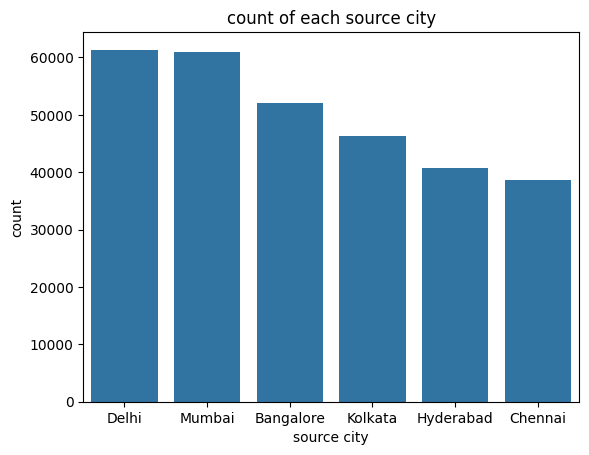

In [313]:
sns.countplot(x="source_city",data=df)
plt.title("count of each source city")
plt.xlabel("source city")
plt.ylabel("count")
plt.show()

the most common source cities are delhi and mumbai

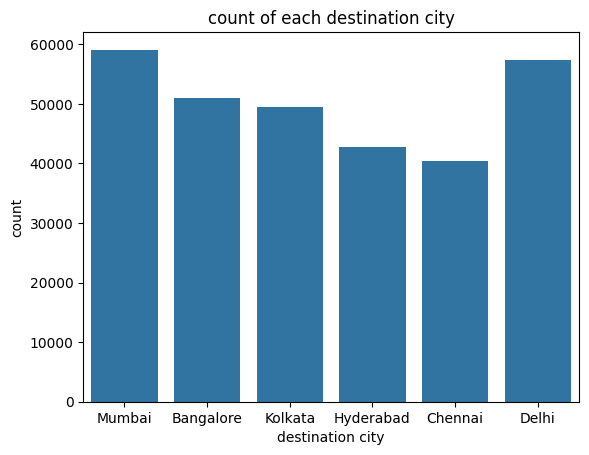

In [314]:
sns.countplot(x="destination_city",data=df)
plt.title("count of each destination city")
plt.xlabel("destination city")
plt.ylabel("count")
plt.show()

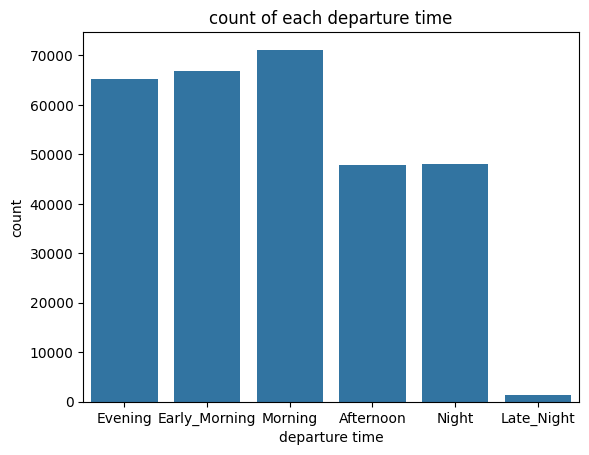

In [315]:
sns.countplot(x="departure_time",data=df)
plt.title("count of each departure time")
plt.xlabel("departure time")
plt.ylabel("count")
plt.show()

the most popular departure time is the morning and the least popular is lare night

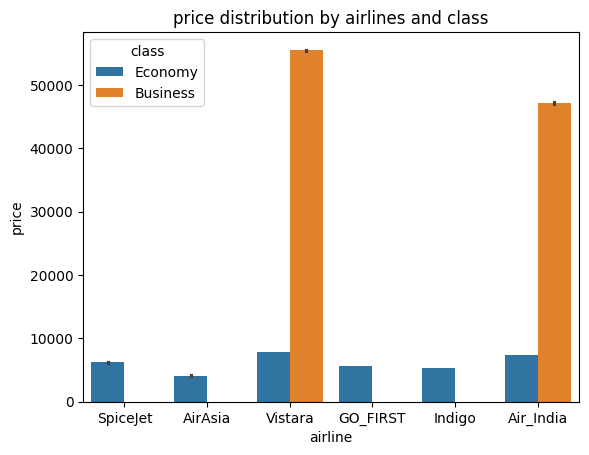

In [316]:
sns.barplot(x="airline",y="price",hue="class",data=df)
plt.title("price distribution by airlines and class")
plt.xlabel("airline")
plt.ylabel("price")
plt.show()

business class only visible at air india and vistara

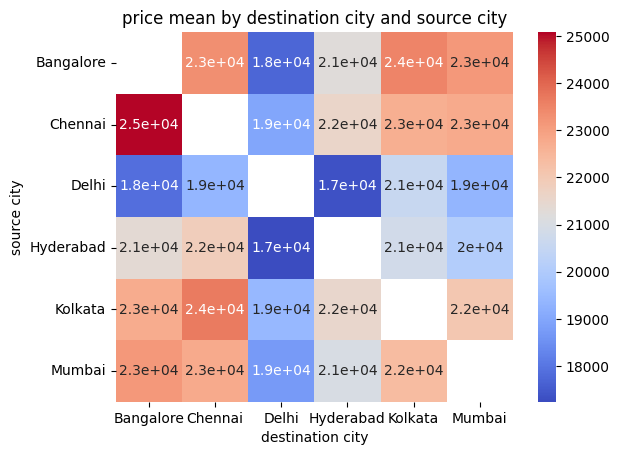

In [317]:
pivot_table=df.pivot_table(
    values="price",
    index="source_city",
    columns="destination_city",
    aggfunc="mean"
)

sns.heatmap(pivot_table,annot=True,cmap="coolwarm")
plt.title("price mean by destination city and source city")
plt.xlabel("destination city")
plt.ylabel("source city")
plt.show()

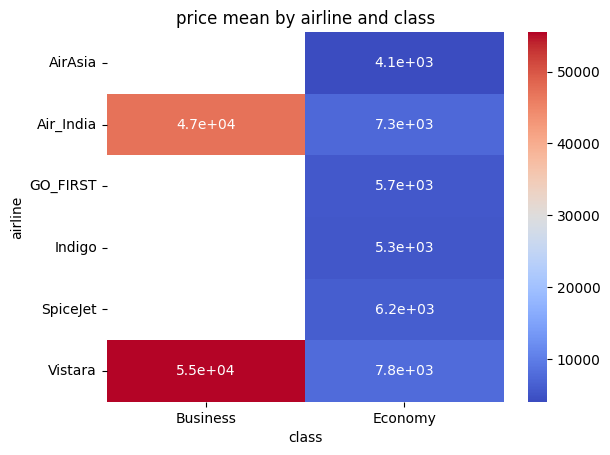

In [318]:
pivot_table=df.pivot_table(
    values="price",
    index="airline",
    columns="class",
    aggfunc="mean"
)

sns.heatmap(pivot_table,annot=True,cmap="coolwarm")
plt.title("price mean by airline and class")
plt.xlabel("class")
plt.ylabel("airline")
plt.show()

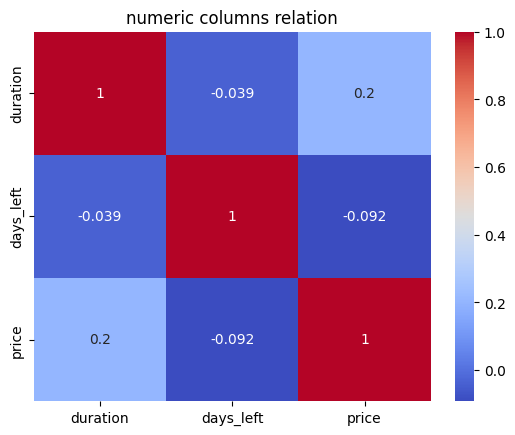

In [319]:
corr=df.corr(numeric_only=True)

sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("numeric columns relation")
plt.show()

In [320]:
df["airline"]=df["airline"].str.strip()
df["flight"]=df["flight"].str.strip()
df["source_city"]=df["source_city"].str.strip()
df["departure_time"]=df["departure_time"].str.strip()
df["arrival_time"]=df["arrival_time"].str.strip()
df["destination_city"]=df["destination_city"].str.strip()
df["class"]=df["class"].str.strip()

In [321]:
df["flight"].unique()

array(['SG-8709', 'SG-8157', 'I5-764', ..., '6E-7127', '6E-7259',
       'AI-433'], dtype=object)

In [322]:
df["arrival_time"].unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [323]:
from sklearn.model_selection import train_test_split

x=df.drop("price",axis=1)
y=df["price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [324]:
x_train["stops"]=x_train["stops"].replace({
    "zero":0,
    "one":1,
    "two_or_more":2
})
x_test["stops"]=x_test["stops"].replace({
    "zero":0,
    "one":1,
    "two_or_more":2
})

/tmp/ipython-input-3446913665.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_train["stops"]=x_train["stops"].replace({
/tmp/ipython-input-3446913665.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_test["stops"]=x_test["stops"].replace({


In [325]:
x_train=x_train.drop(columns=["flight","arrival_time"])
x_test=x_test.drop(columns=["flight","arrival_time"])

In [326]:
from sklearn.preprocessing import OrdinalEncoder

encoder=OrdinalEncoder()
x_train[["encoded_class","encoded_airline","encoded_source_city","encoded_departure_time","encoded_destination_city"]]=encoder.fit_transform(x_train[["class","airline","source_city","departure_time","destination_city"]])
x_test[["encoded_class","encoded_airline","encoded_source_city","encoded_departure_time","encoded_destination_city"]]=encoder.transform(x_test[["class","airline","source_city","departure_time","destination_city"]])

In [327]:
x_train=x_train.drop(columns=["class","airline","source_city","departure_time","destination_city"])
x_test=x_test.drop(columns=["class","airline","source_city","departure_time","destination_city"])

In [328]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train[["scaled_duration","scaled_days_left","scaled_stops","scaled_encoded_class"]]=scaler.fit_transform(x_train[["duration","days_left","stops","encoded_class"]])
x_test[["scaled_duration","scaled_days_left","scaled_stops","scaled_encoded_class"]]=scaler.transform(x_test[["duration","days_left","stops","encoded_class"]])

In [329]:
x_train.head()

,stops,duration,days_left,encoded_class,encoded_airline,encoded_source_city,encoded_departure_time,encoded_destination_city,scaled_duration,scaled_days_left,scaled_stops,scaled_encoded_class
148417,1,19.42,6,1.0,1.0,4.0,0.0,1.0,1.001730,-1.474883,0.190337,0.672461
36879,2,7.00,13,1.0,3.0,2.0,0.0,1.0,-0.724634,-0.958973,2.698522,0.672461
274531,1,21.17,44,0.0,1.0,4.0,0.0,1.0,1.244978,1.325771,0.190337,-1.487074
166397,1,10.25,11,1.0,5.0,3.0,5.0,0.0,-0.272888,-1.106376,0.190337,0.672461
272722,1,26.50,5,0.0,5.0,4.0,5.0,1.0,1.985842,-1.548584,0.190337,-1.487074


In [330]:
x_train=x_train.drop(columns=["duration","days_left","stops","encoded_class"])
x_test=x_test.drop(columns=["duration","days_left","stops","encoded_class"])

In [331]:
x_train.head()

,encoded_airline,encoded_source_city,encoded_departure_time,encoded_destination_city,scaled_duration,scaled_days_left,scaled_stops,scaled_encoded_class
148417,1.0,4.0,0.0,1.0,1.001730,-1.474883,0.190337,0.672461
36879,3.0,2.0,0.0,1.0,-0.724634,-0.958973,2.698522,0.672461
274531,1.0,4.0,0.0,1.0,1.244978,1.325771,0.190337,-1.487074
166397,5.0,3.0,5.0,0.0,-0.272888,-1.106376,0.190337,0.672461
272722,5.0,4.0,5.0,1.0,1.985842,-1.548584,0.190337,-1.487074


In [332]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [333]:
y_predict_train=model.predict(x_train)
y_predict_test=model.predict(x_test)

In [334]:
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,mean_squared_error,r2_score

In [335]:
train_mae=mean_absolute_error(y_train,y_predict_train)
train_mse=mean_squared_error(y_train,y_predict_train)
train_rmse=root_mean_squared_error(y_train,y_predict_train)
train_r2=r2_score(y_train,y_predict_train)

In [336]:
test_mae=mean_absolute_error(y_test,y_predict_test)
test_mse=mean_squared_error(y_test,y_predict_test)
test_rmse=root_mean_squared_error(y_test,y_predict_test)
test_r2=r2_score(y_test,y_predict_test)

In [337]:
print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("Training RMSE:",train_rmse)
print("Training R²:", train_r2)

Training MAE: 4551.911017201078
Training MSE: 48298643.559538014
Training RMSE: 6949.722552702231
Training R²: 0.9062368146370468


In [338]:
print("Testing MAE:", test_mae)
print("Testing MSE:", test_mse)
print("Testing RMSE:", test_rmse)
print("Testing R²:", test_r2)

Testing MAE: 4526.799656906458
Testing MSE: 48412974.33916216
Testing RMSE: 6957.943254954165
Testing R²: 0.90608217426376
